In [7]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import scipy.sparse as sps
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import itertools

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.rcParams['figure.figsize'] = 6, 6
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' #if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [47]:
featureMatrix = sps.load_npz('./Feature Selected/Feat_Selection_VarThr.npz')
labels = np.load('./Feature Selected/Labels.npz')['arr_0']

In [37]:
train, test, train_labels, test_labels = train_test_split(featureMatrix,labels,test_size=.33,random_state=42)

In [48]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-4, hidden_layer_sizes=(100), random_state=1, verbose=True)

In [49]:
clf.fit(train,train_labels)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=100, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=True,
       warm_start=False)

In [52]:
test_predict = clf.predict(test)

cm = confusion_matrix(test_labels,test_predict).astype(float)
cm[0,:] /= cm[0,:].sum()
cm[1,:] /= cm[1,:].sum()

for c in cm:
    print c

[ 0.95016407  0.04983593]
[ 0.06591739  0.93408261]


# Results

Confusion matrix, without normalization
[[ 0.95891481  0.04108519]
 [ 0.0645503   0.9354497 ]]


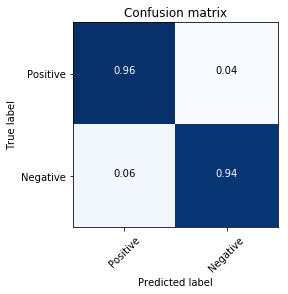

In [8]:
#Lreg

cm = np.array([[ 0.95891481,  0.04108519],
[ 0.0645503,  0.9354497]])

plot_confusion_matrix(cm,['Positive','Negative'])
plt.savefig('NN_LREG.png')
plt.show()

Lreg

[ 0.95891481  0.04108519]

[ 0.0645503  0.9354497]

Confusion matrix, without normalization
[[ 0.95610143  0.04389857]
 [ 0.06929303  0.93070697]]


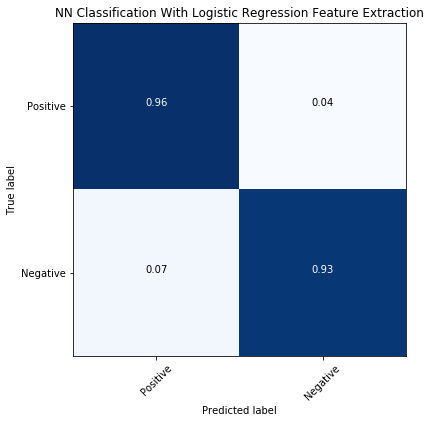

In [27]:
#LREG_SGD

cm = np.array([[ 0.95610143,0.04389857],
[ 0.06929303,0.93070697]])

plot_confusion_matrix(cm,['Positive','Negative'], title='NN Classification With Logistic Regression Feature Extraction')
plt.tight_layout()
plt.savefig('NN_LREG_SGD.png')
plt.show()

LREG SGD

[ 0.95610143  0.04389857]

[ 0.06929303  0.93070697]

Confusion matrix, without normalization
[[ 0.94882631  0.05117369]
 [ 0.06807347  0.93192653]]


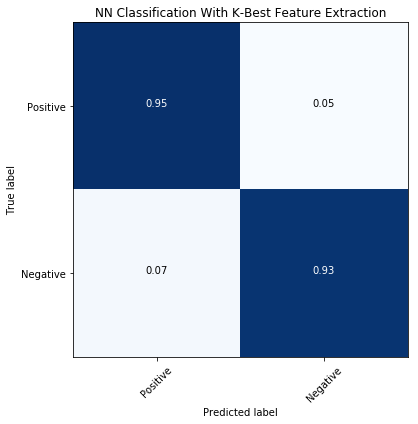

In [28]:
#KBEST

cm = np.array([[ 0.94882631, 0.05117369],
[ 0.06807347, 0.93192653]])

plot_confusion_matrix(cm,['Positive','Negative'], title='NN Classification With K-Best Feature Extraction')
plt.tight_layout()
plt.savefig('NN_KBEST.png')
plt.show()

KBest

[ 0.94882631  0.05117369]

[ 0.06807347  0.93192653]

Confusion matrix, without normalization
[[ 0.94882631  0.05117369]
 [ 0.06807347  0.93192653]]


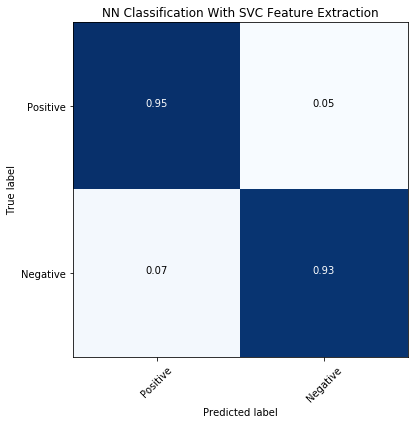

In [29]:
#SVC

cm = np.array([[ 0.94882631, 0.05117369],
[ 0.06807347, 0.93192653]])

plot_confusion_matrix(cm,['Positive','Negative'], title='NN Classification With SVC Feature Extraction')
plt.tight_layout()
plt.savefig('NN_SVC.png')
plt.show()

SVC

[ 0.94882631  0.05117369]

[ 0.06807347  0.93192653]

Confusion matrix, without normalization
[[ 0.94882631  0.05117369]
 [ 0.06807347  0.93192653]]


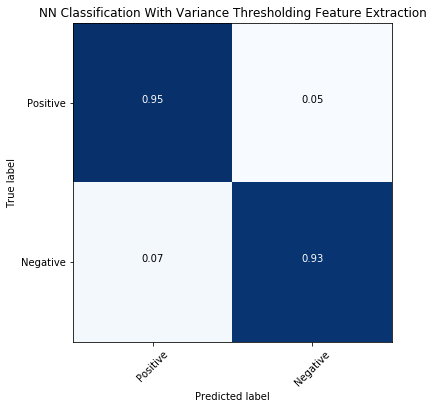

In [30]:
#VAR THR

cm = np.array([[ 0.94882631, 0.05117369],
[ 0.06807347, 0.93192653]])

plot_confusion_matrix(cm,['Positive','Negative'], title='NN Classification With Variance Thresholding Feature Extraction')
plt.tight_layout()
plt.savefig('NN_VAR_THR.png')
plt.show()

Var Thr

[ 0.94882631  0.05117369]

[ 0.06807347  0.93192653]